# Introduction to WordClouds
The most widely used method for text analysis is a wordcloud.
Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s). This type of visualization can assist evaluators with exploratory textual analysis by identifying words that frequently appear in a set of interviews, documents, or other text. It can also be used for communicating the most salient points or themes in the early stage. 

In [1]:
# A sample text snippet from an artile on web regarding Donald Trump
Article= '''Trump-critical media do continue to find elite audiences 
Their investigations still win Pulitzer Prizes; their reporters accept invitations 
to anxious conferences about corruption, digital-journalism standards, the end of nato, 
and the rise of populist authoritarianism. Yet somehow all of this earnest effort feels less
and less relevant to American politics. President Trump communicates with the people directly 
via his Twitter account, ushering his supporters toward favorable information at Fox News or Breitbart.
Despite the hand-wringing, the country has in many ways changed much less than some feared or 
hoped four years ago. Ambitious Republican plans notwithstanding, the American social-welfare system, 
as most people encounter it, has remained largely intact during Trump’s first term. The predicted wave 
of mass deportations of illegal immigrants never materialized. A large illegal workforce remains in the 
country, with the tacit understanding that so long as these immigrants avoid politics, 
keeping their heads down and their mouths shut, nobody will look very hard for them.
'''

In [2]:
# Cleaning the text data to remove all punctuations, numbers and special characters
import re

# removing all the special characters
cleanedArticle = re.sub(r'[?|$|.|!]',r' ',Article)

# removing everything which is not Alphabets
cleanedArticle = re.sub(r'[^a-z A-Z]',r' ',cleanedArticle)  

# Converting the whole text to lowercase
cleanedArticle = cleanedArticle.lower()               

# Deleting any word which is less than 4-characters mostly those are stopwords
cleanedArticle= re.sub(r'\b\w{1,3}\b', ' ', cleanedArticle)

# Stripping extra spaces in the text
cleanedArticle= re.sub(r' +', ' ', cleanedArticle)

cleanedArticle

'trump critical media continue find elite audiences their investigations still pulitzer prizes their reporters accept invitations anxious conferences about corruption digital journalism standards nato rise populist authoritarianism somehow this earnest effort feels less less relevant american politics president trump communicates with people directly twitter account ushering supporters toward favorable information news breitbart despite hand wringing country many ways changed much less than some feared hoped four years ambitious republican plans notwithstanding american social welfare system most people encounter remained largely intact during trump first term predicted wave mass deportations illegal immigrants never materialized large illegal workforce remains country with tacit understanding that long these immigrants avoid politics keeping their heads down their mouths shut nobody will look very hard them '

In [3]:
# Finding out the frequency of words in text
import pandas as pd

# Splitting the text to make list of words
WordList=cleanedArticle.split()

# Creating a Dataframe
WordData=pd.DataFrame(data= pd.Series(WordList), columns=['words'])

# Finding the top frequency words
WordData.groupby('words').size().nlargest(10)

words
their         4
less          3
trump         3
american      2
country       2
illegal       2
immigrants    2
people        2
politics      2
with          2
dtype: int64

In [4]:
WordData['words'].value_counts().head(10)

their         4
less          3
trump         3
immigrants    2
people        2
american      2
with          2
illegal       2
country       2
politics      2
Name: words, dtype: int64

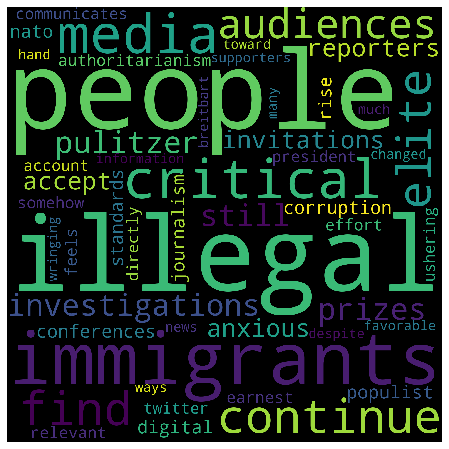

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['Trump','less','the','American','politics','country']

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            width=2000,
                            height=2000
                          ).generate(cleanedArticle)

plt.figure(figsize=(8,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()